# Random Variables

**Further Reading**: §2.4 in Navidi (2015)

## Learning Objectives

After attending class, completing these activities, asking questions, and studying notes, you should be able to:
* Give at least three examples of how an engineer would use statistics
* Explain the difference between a random variable (upper case) and realization (lower case)
* Convert a probability density/mass function into a cumulative distribution function
* Derive mean and variance for a function of random variables from a density/mass function using the definition of expected value

In [1]:
import matplotlib.pyplot as plt

## Statistics: Using Data to ...

## 1. Describe the World

https://istats.shinyapps.io/EDA_quantitative/

## 2. Draw Conclusions (Inferences)

https://istats.shinyapps.io/Inference_prop/

https://istats.shinyapps.io/Association_Categorical/

## 3. Make Decisions Under Uncertainty

**Example: Chemical Reactor Design**

Recall the phenolphthalein reaction from an earlier notebook:

$$
\frac{d[P]}{dt} = -k_{1}[P][OH^-]+k_{2}[POH] ~,
$$

with the analytic solution:

$$
[P] = [P]_{0}\Big(\frac{k_{2}}{k_{1}'+k_{2}}+\frac{k_{1}'}{k_{1}'+k_{2}}e^{-(k_{1}'+k_{2})t}\Big) ~.
$$

We can use use nonlinear regression to estimate the reaction kinetic parameters $k'_1$ and $k_2$.

This example illustrates a common workflow in chemical engineering:

1. Run several experiments at different temperatures, pressures, and feed compositions. Measure compositions at several times as chemical reactions occur.
2. Use nonlinear regression to estimate kinetic model parameters.
3. Use statistical inference to quantify uncertainty in fitted parameters.
4. How much should we oversize/overdesign the reactor to account for the uncertainty in the fitted reaction kinetic parameters?

## Independent Random Variables

**Random variable:** assigns numeric value to each outcome in sample

**Realization:** outcome of an experiment

Observing a random variable (e.g. measuring realization) is analogous to taking a sample from a population.

$$P(X = x)$$

$P$ = probability; $X$ = random variable; $x$ = realization

Random variables X and Y are independent, provided that

**Jointly Discrete:**

$$\rho(x,y) = \rho_X(x) \cdot \rho_Y(y)$$

**Jointly Continuous:**

$$f(x,y) = f_X(x) \cdot f_Y(y)$$

In other words, knowledge about ane variable does not affect the probability distribution of the other.

If X and Y are independent, then 

**Jointly Discrete,**

$$\rho_X(x) > 0 : \rho_{Y | X}(y | x) = \rho_Y(y)$$

**Jointly Continuous,**

$$f_X(x) > 0 : f_{Y | X}(y | x) = f_Y(y)$$

**Example:** Are X (length) and Y (width) indpendent for the following CD cover data?

length (x) | width (y) | $\rho$(X=x and Y=y)
:----: | :-----: | :----:
129 | 15 | 0.12
129 | 16 | 0.08
130 | 15 | 0.42
130 | 16 | 0.28
131 | 15 | 0.06
131 | 16 | 0.04

*Approach:* 
Check if $\rho(X=x \textrm{ and } Y=y) = P(X=x) P(Y=y)$

*Solution:*

$$P(X=129 \textrm{ and } Y=15) = 0.12$$

$$P(X=129) = 0.2$$

$$P(Y=15) = 0.6$$

$$0.2 \times 0.6 = 0.12$$

Yes, it turns out these data are independent.

## Discrete Random Variables

For discrete random variables: possible values are discrete, may be infinite

**Probability Mass Function (PMF):**

$$\rho(x) = P(X=x)$$

The PMF defines the probability of observing each possible outcome.

*Ex: flipping two fair coins*

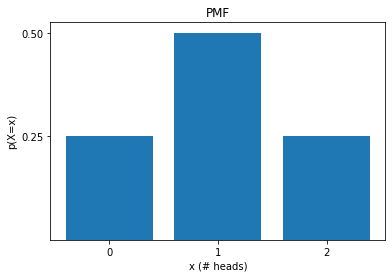

In [20]:
plt.bar([0,1,2],[1/4,1/2,1/4], tick_label = [0,1,2])
plt.yticks(ticks = [1/4,1/2])
plt.xlabel('x (# heads)')
plt.ylabel('p(X=x)')
plt.title('PMF')
plt.show()

**Cumulative Distribution Function (CDF):**

$$F(X) = P(X \leq x)$$

Notice that

$$F(x) = \sum_{t \leq X} \rho(t) = \sum_{t \leq X} P(X=t)$$

and that the probabilities over all possible outcomes sum to 1.

$$\sum_x \rho(x) = \sum_x P(X=x) = 1$$

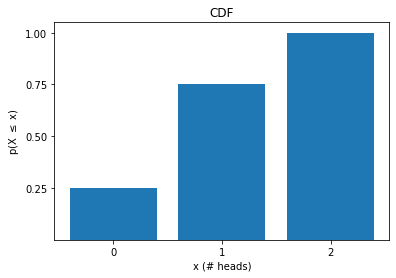

In [18]:
plt.bar([0,1,2],[1/4,3/4,1], tick_label = [0,1,2])
plt.yticks(ticks=[1/4,1/2,3/4,1])
plt.xlabel('x (# heads)')
plt.ylabel('p(X $\leq$ x)')
plt.title('CDF')
plt.show()

## Example for Discrete Random Variables: Flipping Two Independent Coins

Imagine we have two coins: A and B.

$$P(A=\mathrm{Head}) = 0.6$$

$$P(B=\mathrm{Head}) = 0.5$$

Further assume the outcome of these two coins is independent. Let's simulate 1000 coin flips, record the results, and practice some skills from last class.

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

# number of flips
n = 1000

# store results
coin_A = []
coin_B = []

def flip_simple_coin(p):
    ''' Flip a simple coin.
    
    Args:
        p : probability of a head
        
    Returns:
        outcome: 'H' or 'T'
    '''
    
    # Generate uniformly distributed random number on [0,1)
    # then check if is in less than 1-p
    if random.random() < 1 - p:
        return 'H'
    else:
        return 'T'

for i in range(n):
    # flip coin A. Generate uniformly distributed random number on [0,1)
    # then check if is in less than 0.4
    coin_A.append(flip_simple_coin(0.6))
    
    # flip coin B
    coin_B.append(flip_simple_coin(0.4))
    
# assemble into pandas dataframe
d = {"A":coin_A, "B":coin_B}
ind_coins = pd.DataFrame(data=d)

# print first few experiments
ind_coins.head()

,A,B
0,T,H
1,H,T
2,T,T
3,T,H
4,H,T


Let's use pandas to explore the number of outcomes for each coin.

In [2]:
# Coin A
ind_coins.A.value_counts()

T    594
H    406
Name: A, dtype: int64

In [3]:
# Coin B
ind_coins.B.value_counts()

H    571
T    429
Name: B, dtype: int64

We can also use pandas to calculate the number of coin flips for each possible outcome.

In [4]:
ind_coins.groupby('A')['B'].value_counts()

A  B
H  H    250
   T    156
T  H    321
   T    273
Name: B, dtype: int64

And we can convert to frequencies by dividing by the total number of coins:

In [5]:
ind_coins.groupby('A')['B'].value_counts() / len(ind_coins)

A  B
H  H    0.250
   T    0.156
T  H    0.321
   T    0.273
Name: B, dtype: float64

<div class="admonition seealso"> 
    <p class="title"><b>Home Activity</b></p>
 Rerun your code. Why do you expect the results to change?
</div>

I ran the simulation on my computer and saved the results to a csv file with the following command:

`ind_coins.to_csv(r'two_simple_coins.csv',index = None)`

Let's read in the data file.

In [6]:
ind_coins_saved = pd.read_csv('https://raw.githubusercontent.com/ndcbe/data-and-computing/main/notebooks/data/two_simple_coins.csv')

# print first few experiments
print(ind_coins_saved.head())

# determine number of coin flips
n = len(ind_coins_saved)

   A  B
0  H  H
1  T  H
2  T  H
3  T  H
4  T  H


And now we'll repeat the analysis from above. Notice I divided everything by the number of coin flips to compute frequencies.

In [7]:
# Coin A
pA = ind_coins_saved.A.value_counts() / n
print(pA)

T    0.592
H    0.408
Name: A, dtype: float64


In [8]:
# Coin B
pB = ind_coins_saved.B.value_counts() / n
print(pB)

H    0.629
T    0.371
Name: B, dtype: float64


In [9]:
pAB = ind_coins_saved.groupby('A')['B'].value_counts() / n
print(pAB)

A  B
H  H    0.244
   T    0.164
T  H    0.385
   T    0.207
Name: B, dtype: float64


<div class="admonition seealso"> 
    <p class="title"><b>Home Activity</b></p>
 Calculate the following probabilities from the data stored in <tt>ind_coins_saved</tt>. You may use either Python or pencil and paper. Store your answer in the Python dictionary <tt>ans_simple_coin</tt>.
</div>

**Probability**

$P(A = H) = $

$P(A = T) = $

$P(B = H) = $

$P(B = T) = $

**Joint Probability**

We'll introduce some shorthand. Assume the first argument is coin A and the second argument is coin B.

$P(A=H,B=H) = P(H,H) = $

$P(H,T) = $

$P(T,H) = $

$P(H,T) = $

**Conditional Probability**

$P(A = H | B = T) = $

$P(A = H | B = H) = $

$P(A = T | B = T) = $

$P(A = T | B = H) = $

In [10]:
# Store your answers in this dictionary

ans_simple_coin = {}

ans_simple_coin['P(A=H)'] = 0
ans_simple_coin['P(A=T)'] = 0
ans_simple_coin['P(B=H)'] = 0
ans_simple_coin['P(B=T)'] = 0

ans_simple_coin['P(H,H)'] = 0
ans_simple_coin['P(H,T)'] = 0
ans_simple_coin['P(T,H)'] = 0
ans_simple_coin['P(T,T)'] = 0

ans_simple_coin['P(A=H|B=T)'] = 0
ans_simple_coin['P(A=H|B=H)'] = 0
ans_simple_coin['P(A=T|B=T)'] = 0
ans_simple_coin['P(A=T|B=H)'] = 0

# Add your solution here

{'P(A=H)': 0.408, 'P(A=T)': 0.592, 'P(B=H)': 0.629, 'P(B=T)': 0.371, 'P(H,H)': 0.244, 'P(H,T)': 0.164, 'P(T,H)': 0.385, 'P(T,T)': 0.207, 'P(A=H|B=T)': 0.4420485175202157, 'P(A=H|B=H)': 0.38791732909379967, 'P(A=T|B=T)': 0.5579514824797843, 'P(A=T|B=H)': 0.6120826709062003}


In [11]:
# Removed autograder test. You may delete this cell.

Imagine we were just given the data. We do not know exactly how the data were collected. We want to determine if coins A and B are independent.

Recall, if A and B are dependent, we expect:

$$P(B | A) = P(B)$$

and equivalently

$$P(A | B) = P(A)$$

for $P(A) > 0$ and $P(B) > 0$.

Let's print out your previous answer:

In [12]:
for k in ans_simple_coin.keys():
    print(k," = ",ans_simple_coin[k])

P(A=H)  =  0.408
P(A=T)  =  0.592
P(B=H)  =  0.629
P(B=T)  =  0.371
P(H,H)  =  0.244
P(H,T)  =  0.164
P(T,H)  =  0.385
P(T,T)  =  0.207
P(A=H|B=T)  =  0.4420485175202157
P(A=H|B=H)  =  0.38791732909379967
P(A=T|B=T)  =  0.5579514824797843
P(A=T|B=H)  =  0.6120826709062003


<div class="admonition seealso"> 
    <p class="title"><b>Home Activity</b></p>
 Inspect these values and determine if coins A and B are independent. Select from the multiple choice options below and store your answer as an integer in the Python variable <tt>ans_simple_coin_ind</tt>.
</div>

**Multiple Choice Options**:
1. Coins A and B are independent. The probabilities match exactly.
2. Coins A and B are likely independent. The probabilities are close, but do not match exactly. But we expect this, as the data were generated from a random process.
3. Coins A and B are clearly NOT independent. Nice try, but I saw through your trick.

In [13]:
# Add your solution here

In [14]:
# Removed autograder test. You may delete this cell.

## Continuous Random Variables

For continuous random variables: outcomes are continuous and even if outcomes are bounded, the space is infinite.

**Probability Density Function:**

$$\rho(X=x) = f(x)$$

We need to integrate to interpret:

$$\rho(a \leq X \leq b) = \rho(a \leq X \leq b) = \rho(a < X \leq b)$$

$$ = \rho(a < X < b) = \int_a^b f(x)dx$$

Likewise,

$$\rho(X \leq b) = \rho(X < b) = \int_{-\infty}^b f(x)dx$$

$$\rho(X \geq a) = \rho(X > a) = \int_a^{\infty} f(x)dx$$

It's important to note that

$$\int_{-\infty}^{\infty} f(x)dx = 1$$

## Another Example: Continous Random Variables

In class, we will derive the mean and standard deviation for a random variable that follows the **uniform distribution** (all outcomes equally probable). Let's explore these properties with simulation first.

Let's generate 1000 random numbers between 0 and 1 with equal probability.

In [15]:
my_nums = np.random.random(1000)

# Let's look at the first 5 elements
print(my_nums[0:5])

[0.78230074 0.39672722 0.51206773 0.10962664 0.95134558]


Now let's create a pandas data frame from your numpy array.

In [16]:
u = pd.DataFrame({'U':my_nums})
u.head()

,U
0,0.782301
1,0.396727
2,0.512068
3,0.109627
4,0.951346


<div class="admonition seealso"> 
    <p class="title"><b>Home Activity</b></p>
 Create a histogram to visualize the simulated data.
</div>

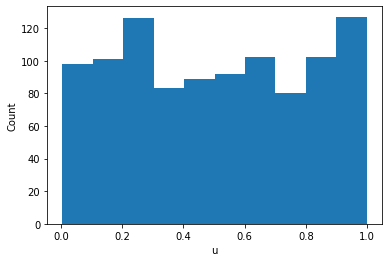

In [17]:
# Add your solution here

<div class="admonition seealso"> 
    <p class="title"><b>Home Activity</b></p>
 Compute the mean and variance of the 1000 random numbers. Store your results in the Python floats <tt>u_mean</tt> and <tt>u_var</tt>.
</div>

In [21]:
# Add your solution here

mean =  0.49008904352767446
var =  0.07868607462072559


In [22]:
# Removed autograder test. You may delete this cell.

## Linear Combination of Random Variables

Consider 

$$c_1x_1 + ... + c_2x_2 = z$$

**What is $E[z]$?**

*Observation:* $E[\cdot]$ operator involves summation (discrete) or integration (continuous). Both of these are separable over addition.

$$E[z] = E[c_1x_1] + E[c_2x_2] + ... + E[c_nx_n]$$

Move $c_1$ outside $E[\cdot]$.

$$ E[z] = c_1E[x_1] + E[c_2x_2] + ... + E[c_nx_n]$$

$$ E[z] = c_1\mu_{x_1} + c_2\mu_{x_2} + ... + c_n\mu_{x_n}$$

**What about $var[z]$?**

$$var[z] = E[(z-\mu_z)^2] = E[z^2] - \mu_z^2$$

Let's consider $z = c_1X + c_2Y$ with $X$ and $Y$ continuous:

$$E[z^2] = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} (c_1X + c_2Y)^2 f_{X,Y}(x,y)dxdy$$

$$E[z^2] = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} (c_1^2x^2 + 2c_1c_2xy + c_2^2y) f_{X,Y}(x,y)dxdy$$

Split over addition.

$$E[z^2] = c_1^2 \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} (x^2 f_{X,Y}(x,y)dxdy + 2c_1c_2 \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} xy f_{X,Y}(x,y)dxdy + c_2^2 \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} y^2 f_{X,Y}(x,y)dxdy$$

$$E[z^2] = c_1^2 var[X] + 2c_1c_2 cov[X,Y] + c_2^2 var[Y]$$

See the textbook for more detailed steps. We will use this with error propogation.